# Database - Pima Indians Diabetes

Apply machine learning techniques for given classification in a dataset that describes a population that is under a high risk of the onset of diabetes.

# Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# render the plot inline, instead of in a separate window
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Setting the right figure format
import warnings
warnings.filterwarnings('ignore')

# Importing dataset 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",names= ["pregnancy","Glucose","Bloodpressure","skinthichness","insulin","bmi","pedigreefunction","age","outcome"])

# Additional details about the attributes
1)Pregnancies: Number of times pregnant

2)Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3)BloodPressure: Diastolic blood pressure (mm Hg)

4)SkinThickness: Triceps skin fold thickness (mm)

5)Insulin: 2-Hour serum insulin (mu U/ml)

6)BMI: Body mass index (weight in kg/(height in m)^2)

7)DiabetesPedigreeFunction: Diabetes pedigree function

8)Age: Age (years)

9)Outcome: Class variable (0 or 1)

In [3]:
df.shape # take a look at the shape

(768, 9)

In [4]:
df.head(5) # take a look at the first and last few lines

,pregnancy,Glucose,Bloodpressure,skinthichness,insulin,bmi,pedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().values.any() #looks like we don't have any nulls

False

In [6]:
df.groupby("outcome").size()  # Grouping by the last Parameter to check the number of Positives and Negatives

outcome
0    500
1    268
dtype: int64

# Visualization of data

# Count plot

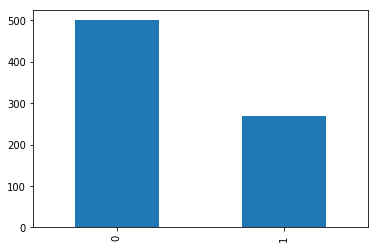

In [20]:
df['outcome'].value_counts().plot('bar')  # Just seeing the same stuff on bars

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3cd429630>,
      dtype=object)

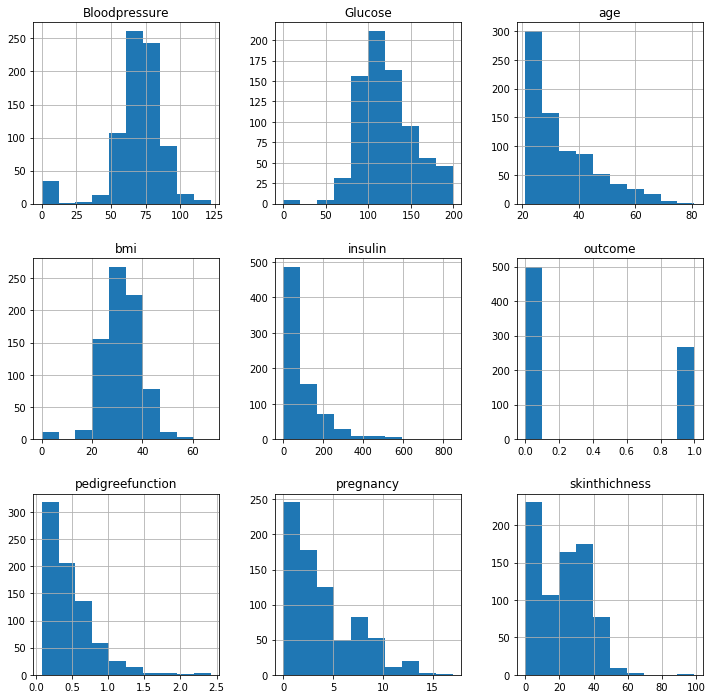

In [21]:
df.hist(figsize=(12,12))   # Visualizing each parameter

Attributes BMI, BloodPressure, Glucose are found to be normally distributed.

BMI and BloodPressure nearly have Gaussian distribution.

Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed.

In [7]:
def plot_corr(df,size=11): 
    corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks

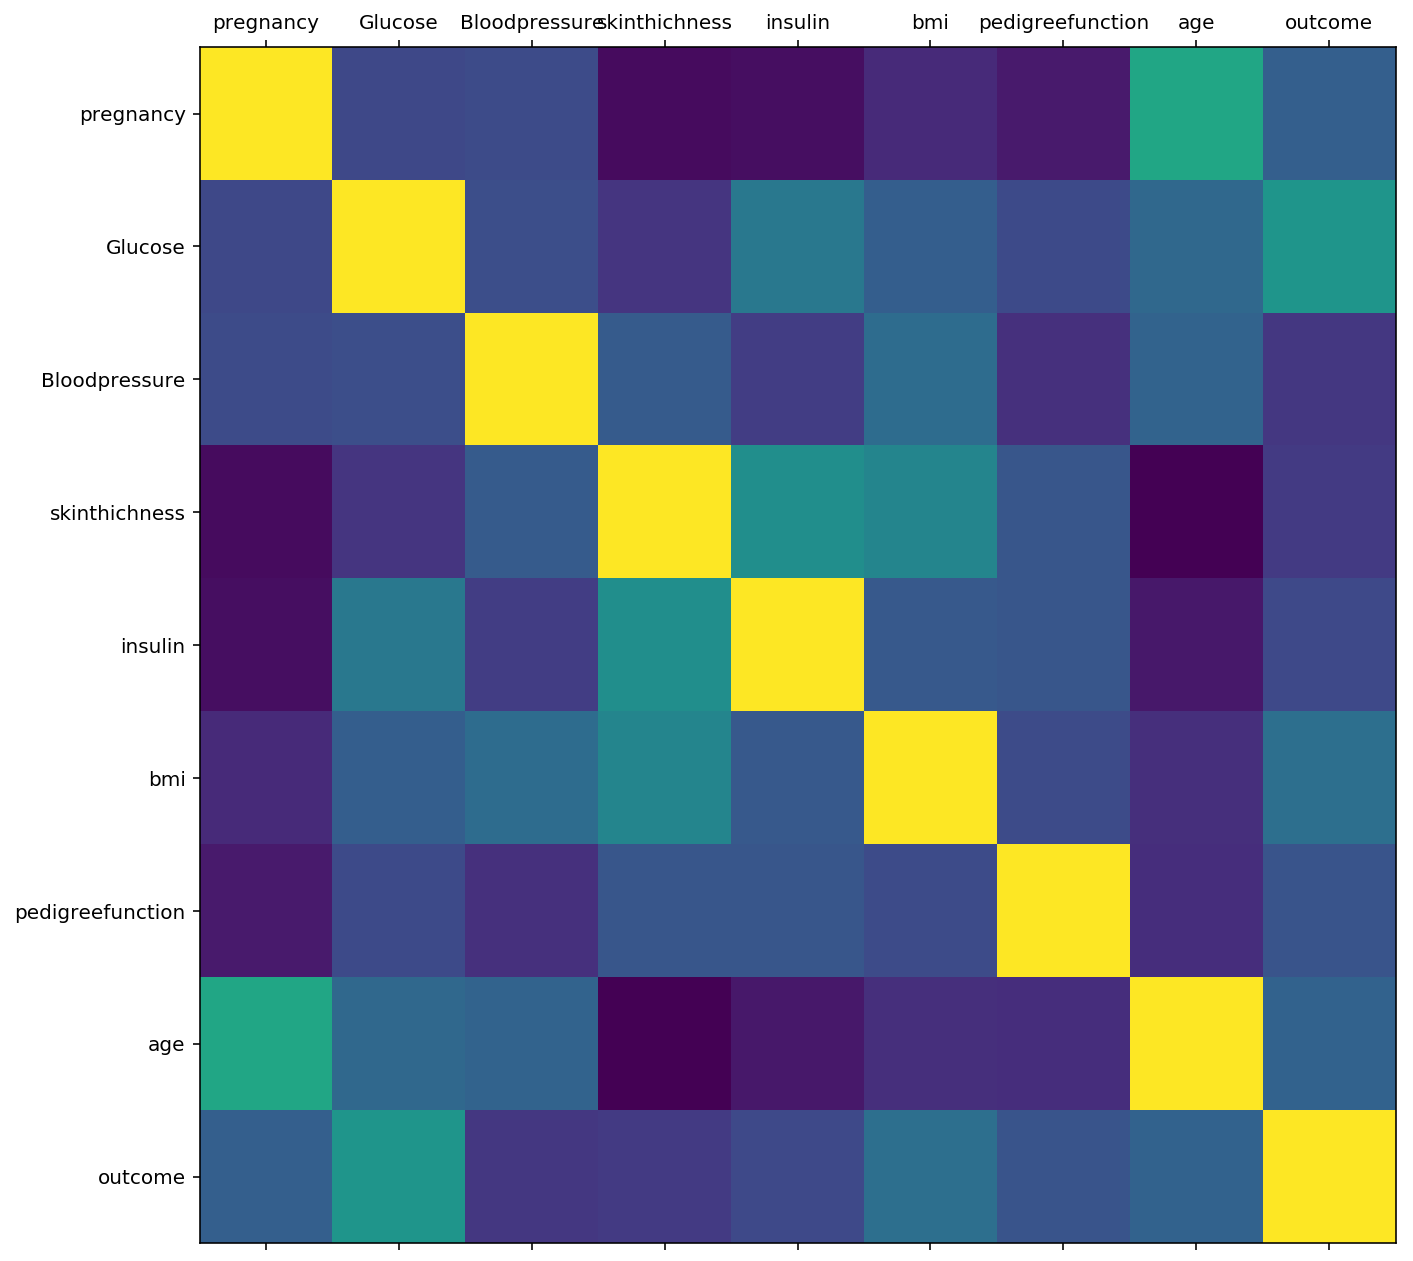

In [8]:
plot_corr(df)

In [9]:
# looks like skin and thickness are highly correlated. Let's check the exact numbers for correlation
df.corr()

,pregnancy,Glucose,Bloodpressure,skinthichness,insulin,bmi,pedigreefunction,age,outcome
pregnancy,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthichness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Box plot 

pregnancy              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Bloodpressure       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skinthichness          AxesSubplot(0.125,0.391471;0.227941x0.222059)
insulin             AxesSubplot(0.398529,0.391471;0.227941x0.222059)
bmi                 AxesSubplot(0.672059,0.391471;0.227941x0.222059)
pedigreefunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
age                    AxesSubplot(0.398529,0.125;0.227941x0.222059)
outcome                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

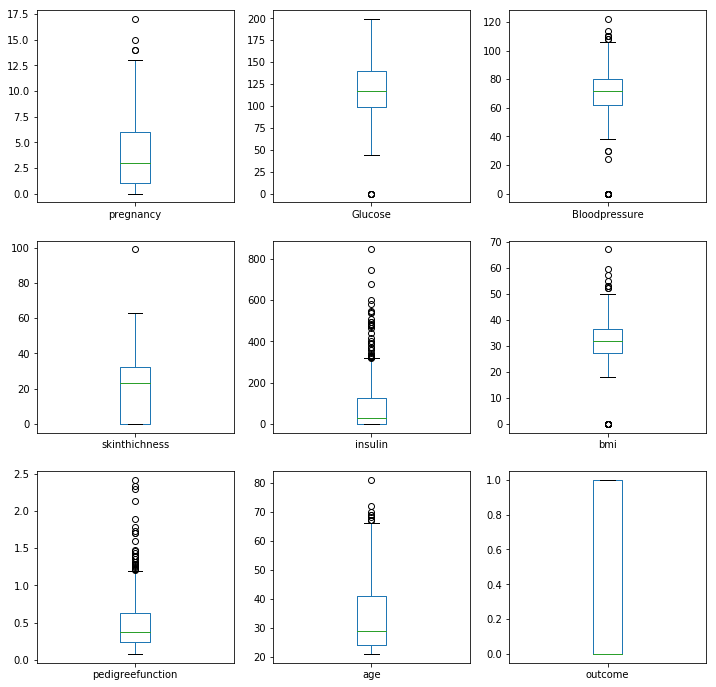

In [25]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12)) 

# Box plot helps to know the median value, Inter Quartile Range and Overall distribution of the data.

# Observed that spread of attributes is quite different.

Attributes Age, Insulin appear to be quite skewed towards smaller values.

Scaling on dataset can be applied during data pre-processing.

# Heatmap 

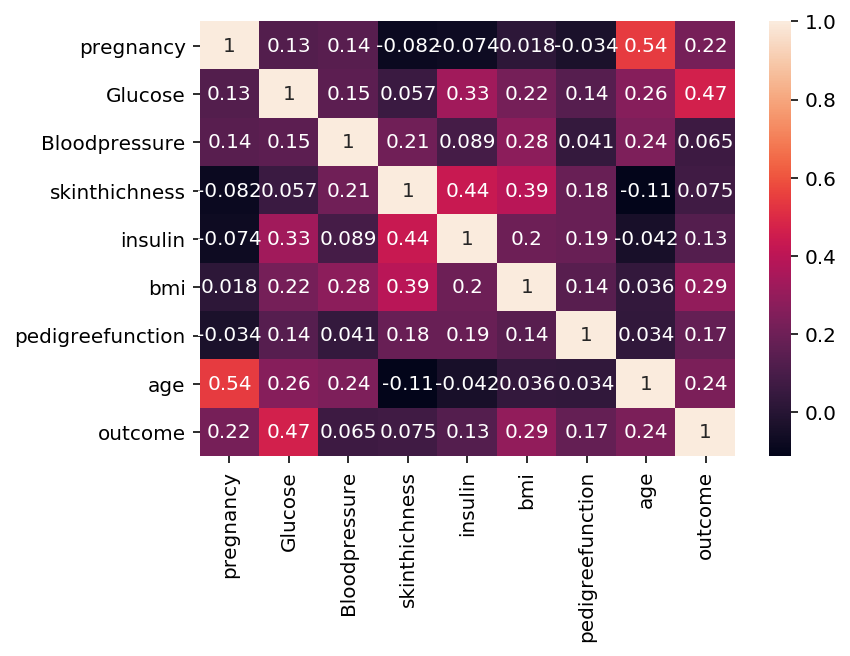

In [28]:
sns.heatmap(df.corr(), annot=True)

# df.corr() checks for the cross tab correlation between each paramter and 

# we are visualizing it on a heat map. Just seeing one half of the map will suffice.

Observed that attributes BloodPressure, SkinThickness are not much related to outcome.

Feature extraction can be tried to observe performance.

# Data Pre-processing

In [10]:
# Split into Input and Output.
attributes = list(df.columns[:8])  # creates a list of all paramter names
X = df[attributes].values  # masking the parameter values
y= df['outcome'].values  # Just picking up values from Outcome.

In [12]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)  # Transforming

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

# Evaluating Models

In [14]:
# Importing the entire classifier suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [15]:
# Creating objects of required models.
# Within a list storing all the objects in a tuple form -> (nameofalgo, objectofalgo)
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))

# Cross Validation 

In [24]:
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
# It gives you an unbiased estimate of the actual performance you will get at runtime
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
    results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

SVM Linear           76.37 (+/-) 4.29 
Ridge                76.05 (+/-) 4.43 
LR                   75.73 (+/-) 5.22 
Calibrated           75.73 (+/-) 4.64 
LinearSVC            75.73 (+/-) 4.86 
Bagging              75.56 (+/-) 6.37 
SVM RBF              75.40 (+/-) 3.60 
LDA                  75.40 (+/-) 4.63 
GNB                  73.78 (+/-) 4.50 
GradientBoosting     73.77 (+/-) 6.51 
KNN                  73.29 (+/-) 3.48 
QDA                  72.63 (+/-) 5.78 
AdaBoost             72.31 (+/-) 3.34 
Random Forest        71.85 (+/-) 6.08 
DecisionTree         67.59 (+/-) 7.37 


# Optimize peformance of best model
SVM Linear seems performs best. Now let us try to find the optimistic parameters for SVM using GridSearchCV.

In Support Vector Machine (SVM), we need to choose different parameters to optimize our algorithms.

Choice of kernel (Similarity function) 
1)Linear kernel 
2)Polynomial kernel
3)Logisitic/ Sigmoid kernel 
4)Gaussian/RBF kernel 

Choice of Gamma ( if using Gaussian kernel) Parameter C

Choice of C parameter
The C parameter controls the tradeoff between classification of training points accurately and a smooth decision boundary or in a simple word, it suggests the model to choose data points as a support vector.

1)If gamma and C parameter is high then overfittingg will happen.
2)If gamma and C parameter is low then underfithing will happen.
 Thus we need to choose the optimal value of C and Gamma in order to get a good fit.

In [36]:
from sklearn.model_selection import GridSearchCV
model = SVC()
paramaters = [
             {'C' : [0.01, 0.1, 1, 10, 100, 1000], 'kernel' : ['linear']}   
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  
print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

Best accuracy :  0.760586319218241
Best parameters : {'C': 0.1, 'kernel': 'linear'}


# Finalize model

In [19]:
# Predicting output for test set. 
final_model = SVC(C = 0.1, kernel = 'linear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

[[98  9]
 [18 29]]
82.46753246753246
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

   micro avg       0.82      0.82      0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

